# Compito Esercitazione 4
* Import E4
* Data Loader E4
* **Warping**
* **Collage**
* **Relazione**

## Import E4

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

In [2]:
print(cv.__version__)

3.4.2


## Data Loader E4

In [30]:
# Imposta le dimensioni di visualizzazione nel notebook
plt.rcParams['figure.figsize'] = [15, 5] # width, height

im1 = cv.imread('images/boat1.jpg', 0)
im2 = cv.imread('images/boat3.jpg', 0)

## Warping

L'image stitching in questo caso avverà ricercando una omografia tra le due immagini dello stesso soggetto, attraverso la ricerca statistica della trasformazione migliore dei keypoints dell'una nei matching keypoints dell'altra. Una volta deformata (warped) l'immagine, sembrerà "ruotata e traslata" nella prospettiva di quella complementare

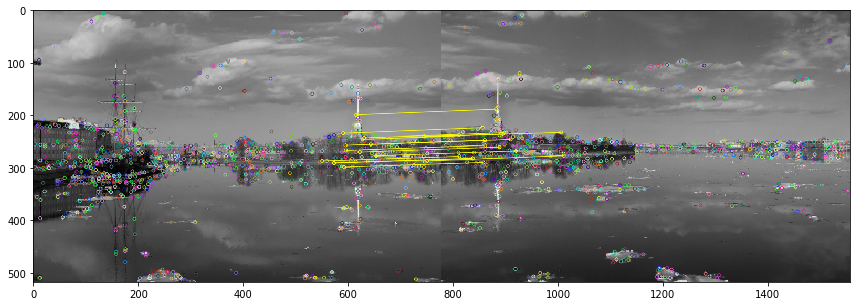

In [23]:
kpsb1, featuresb1 = sift.detectAndCompute(im1, None)
kpsb2, featuresb2 = sift.detectAndCompute(im2, None)

bf2 = cv.BFMatcher(crossCheck=True) #cross check per biunivocità della relazione di similitudine
matches2 = bf.match(featuresb1, featuresb2)
matches2 = sorted(matches2, key=lambda x:x.distance) #ordino i match per distanza così posso selezionare solo i tot pià vicini
matchImg2 = cv.drawMatches(im1, kpsb1, im2, kpsb2, matches2[0:15], outImg=None, matchColor=[255,255,0])
plt.imshow(matchImg2, cmap='gray'); plt.show()

In [24]:
coord1 = np.zeros((len(matches2), 2), dtype=np.float32)
coord2 = np.zeros((len(matches2), 2), dtype=np.float32)

for i, match in enumerate(matches2):
    coord1[i, :] = kpsb1[match.queryIdx].pt
    coord2[i, :] = kpsb2[match.trainIdx].pt

homography, mask = cv.findHomography(coord2, coord1, cv.RANSAC)

In [25]:
print(homography)

[[ 5.70309615e-01 -7.49227601e-03  5.20668184e+02]
 [-1.52729586e-01  9.20766454e-01  2.95572968e+01]
 [-5.49987572e-04 -1.61803396e-05  1.00000000e+00]]


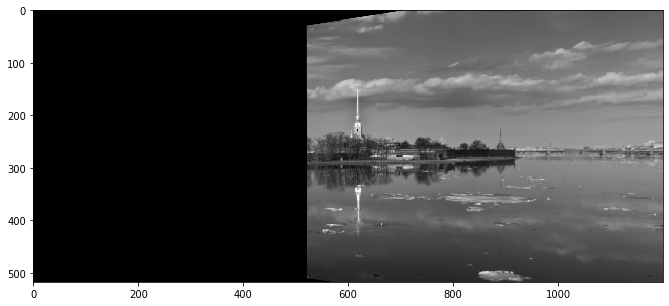

In [28]:
def myWarp(image, homography):
    temp = cv.warpPerspective(image, homography, dsize=(1200, im1.shape[0])) # larghezza arbitraria osservando le immagini affiancate
    return temp

temp = myWarp(im2, homography)
plt.imshow(X=temp, cmap='gray'); plt.show()

## Collage

Con un'immagine deformata in prospettiva, si può incollare quella che fa da base, avendo la garanzia della sovrapposizione dei matching keypoints come fulcro del collage

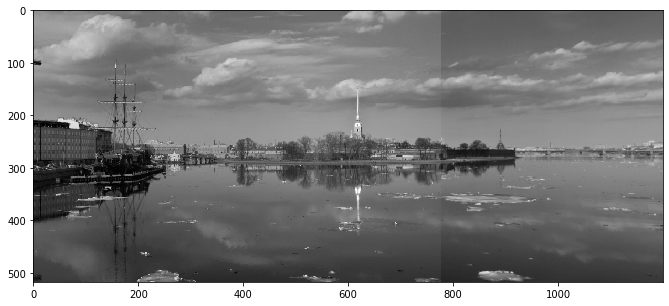

In [29]:
def myCollage(im_base, im_new):
    im_base[:im_new.shape[0],:im_new.shape[1]] = im_new
    return im_base

fin = myCollage(temp, im1)
plt.imshow(fin, cmap='gray') 
plt.show()

## Relazione

Le due immagini dello stesso soggetto da prospettive diverse sono state unite tramite la ricerca dei rispettivi keypoints, l'ordinamento dei match più rilevanti e la ricerca di una trasformazione nello spazio coerente con la ripresa di detto soggetto. Infine sono state sovrapposte ottenendo un collage quasi invisibile geometricamente, tradito solo dalla diversa luminosità delle foto.